In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import time
import requests


In [114]:
data = 'HIVdb.csv'
bdb = pd.read_csv(data, low_memory=False)

In [116]:
HIV_df = bdb.copy()


In [8]:


# function to do an http request to get the publication year using CrossRef
def get_publication_year(doi):
    url = f"https://api.crossref.org/works/{doi}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        data = response.json()
        
        year = data['message']['published']['date-parts'][0][0]
        return year
    except Exception as e:
        print(f"Could not retrieve year for DOI {doi}: {e}")
        return None

# Apply the function to each DOI in your DataFrame
print(get_publication_year(HIV_df.iloc[1]['Article DOI']))
#HIV_df['year'] = HIV_df['Article DOI'].apply(lambda x: get_publication_year(x))

doi_df = HIV_df['Article DOI'].value_counts().reset_index()
doi_df['year'] = doi_df['Article DOI'].apply(lambda x : get_publication_year(x))
doi_df

1996


,Article DOI,count,year
0,10.1021/acs.jmedchem.5b01879,232,2016
1,10.1021/jm9602571,203,1996
2,10.1016/j.ejmech.2018.09.013,183,2018
3,10.1021/jm00025a009,176,1995
4,10.1021/jm960759e,172,1997
...,...,...,...
891,10.1016/j.bmc.2012.07.026,1,2012
892,10.1039/d0md00025f,1,2020
893,10.1021/acs.jmedchem.0c01063,1,2020
894,10.1016/j.bmcl.2012.06.020,1,2012


In [ ]:
##rdkit import

In [120]:
##merge the dataset to have a column contain the year
HIV_df = pd.merge(HIV_df, doi_df, on='Article DOI', how='outer')
####remove useless columns
#HIV_df = HIV_df.drop(columns=['year_x', 'count_x', 'count_y'])

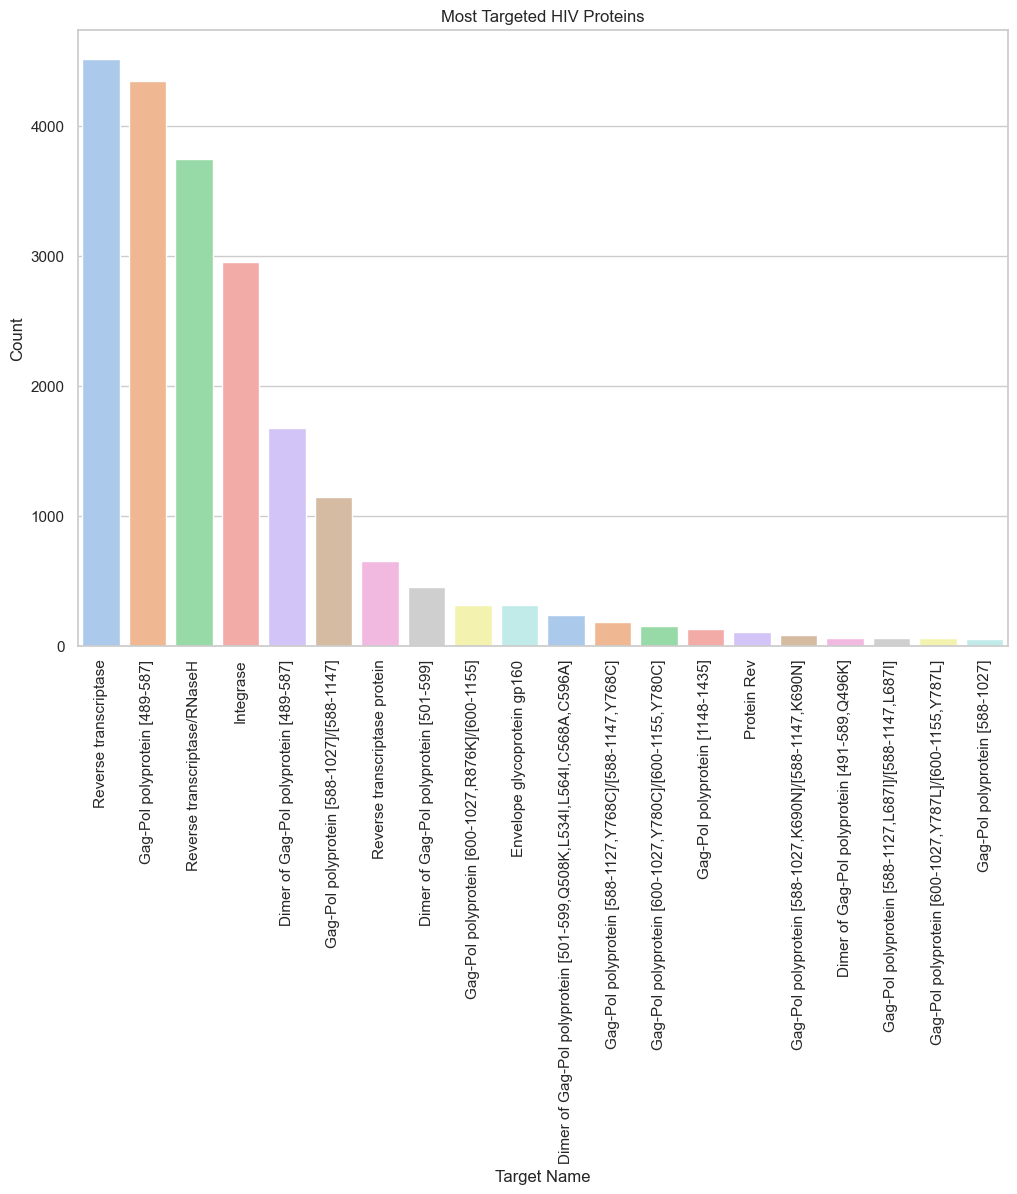

In [155]:
### plotting the most frequent target proteins 
targeted = HIV_df['Target Name'].value_counts().head(20)

# Plot using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot( x=targeted.index, y=targeted.values, hue=targeted.index, palette="pastel", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.title("Most Targeted HIV Proteins")
plt.xlabel("Target Name")
plt.ylabel("Count")
plt.show()


In HIV all the proteins targeted are basically REVERSE TRANSCRIPTASE or GAG-POL or
REVERSE TRASCRIPTASE is an enzyme that converts the virus's single-stranded RNA genome into double-stranded DNA after the virus enters a host cell.  Reverse transcriptase is a major target for antiretroviral drugs. Inhibitors of this enzyme, such as nucleoside and non-nucleoside reverse transcriptase inhibitors (NRTIs and NNRTIs), are used to prevent HIV from replicating.
GAG-POL is a polyprotein precursor produced from the HIV genome, containing several essential viral proteins (including reverse trascriptase). Protease inhibitors are drugs which target the Pol-encoded protease, prevent the maturation of new viral particles, thus rendering them non-infectious.
Interesting.... so the target protein influences the type of drug (NRTIs or Protease inhibitors), but what other drugs classes are there?

by doing a literature reaserch we came up with 'HIV Antiretroviral Therapy' book (https://www.ncbi.nlm.nih.gov/books/NBK513308/) and were able to identify the following dictionary that groups drugs based on their mechanism of action. note that this is just as a proof of example, it could be expanded by integrating new if we pursue furhter with this analysis.


In [126]:

###drug dictionary based on classes ( reported also ligand inchi key as tool to identify the drugs in the binding db) 

drug_class_dict = {
    # RTIs (NRTIs)
    'HBOMLICNUCNMMY-XLPZGREQSA-N': 'RTI (NRTI)',  # Zidovudine (AZT)
    'JTEGQNOMFQHVDC-NKWVEPMBSA-N': 'RTI (NRTI)',  # Lamivudine (3TC)
    'XQSPYNMVSIKCOC-NTSWFWBYSA-N': 'RTI (NRTI)',  # Emtricitabine (FTC)
    'VCMJCVGFSROFHV-WZGZYPNHSA-N': 'RTI (NRTI)',  # Tenofovir (TDF)   MISSING
    'LDEKQSIMHVQZJK-CAQYMETFSA-N': 'RTI (NRTI)',  # Tenofovir alafenamide (TAF) MISSING
    
    # RTIs (NNRTIs)
    'XPOQHMRABVBWPR-ZDUSSCGKSA-N': 'RTI (NNRTI)', # Efavirenz (EFV)
    'NQDJXKOVJZTUJA-UHFFFAOYSA-N': 'RTI (NNRTI)', # Nevirapine (NVP)
    'WUZMTDIGJDWGJM-UHFFFAOYSA-N': 'RTI (NNRTI)', # Etravirine (ETR) MISSING
    'GIJXKZJWITVLHI-UHFFFAOYSA-N': 'RTI (NNRTI)', # Rilpivirine (RPV)
    
    # Protease Inhibitors (PIs)
    'NCDNCNXCDXHOMX-XGKFQTDJSA-N': 'PI',          # Ritonavir (RTV)
    'KJHKTHWMRKYKJE-SUGCFTRWSA-N': 'PI',          # Lopinavir (LPV)
    'AXRYRYVKAWYZBR-GASGPIRDSA-N': 'PI',          # Atazanavir (ATV)
    'CJBJHOAVZSMMDJ-HEXNFIEUSA-N': 'PI',          # Darunavir (DRV)
    'QWAXKHKRTORLEM-UGJKXSETSA-N': 'PI',          # Saquinavir (SQV)
    
    # Integrase Strand Transfer Inhibitors (INSTIs)
    'CZFFBEXEKNGXKS-UHFFFAOYSA-N': 'INSTI',       # Raltegravir (RAL)
    'RHWKPHLQXYSBKR-BMIGLBTASA-N': 'INSTI',       # Dolutegravir (DTG)
    'JUZYLCPPVHEVSV-LJQANCHMSA-N': 'INSTI',       # Elvitegravir (EVG)
    'SOLUWJRYJLAZCX-LYOVBCGYSA-N': 'INSTI'        # Bictegravir (BIC)
}


drug_name_dict = {
    # RTIs (NRTIs)
    'HBOMLICNUCNMMY-XLPZGREQSA-N': 'Zidovudine',
    'JTEGQNOMFQHVDC-NKWVEPMBSA-N': 'Lamivudine',
    'XQSPYNMVSIKCOC-NTSWFWBYSA-N': 'Emtricitabine',
    'VCMJCVGFSROFHV-WZGZYPNHSA-N': 'Tenofovir',
    'LDEKQSIMHVQZJK-CAQYMETFSA-N': 'Tenofovir alafenamide',
    
    # RTIs (NNRTIs)
    'XPOQHMRABVBWPR-ZDUSSCGKSA-N': 'Efavirenz',
    'NQDJXKOVJZTUJA-UHFFFAOYSA-N': 'Nevirapine',
    'WUZMTDIGJDWGJM-UHFFFAOYSA-N': 'Etravirine',
    'GIJXKZJWITVLHI-UHFFFAOYSA-N': 'Rilpivirine',
    
    # Protease Inhibitors (PIs)
    'NCDNCNXCDXHOMX-XGKFQTDJSA-N': 'Ritonavir',
    'KJHKTHWMRKYKJE-SUGCFTRWSA-N': 'Lopinavir',
    'AXRYRYVKAWYZBR-GASGPIRDSA-N': 'Atazanavir',
    'CJBJHOAVZSMMDJ-HEXNFIEUSA-N': 'Darunavir',
    'QWAXKHKRTORLEM-UGJKXSETSA-N': 'Saquinavir',
    
    # Integrase Strand Transfer Inhibitors (INSTIs)
    'CZFFBEXEKNGXKS-UHFFFAOYSA-N': 'Raltegravir',
    'RHWKPHLQXYSBKR-BMIGLBTASA-N': 'Dolutegravir',
    'JUZYLCPPVHEVSV-LJQANCHMSA-N': 'Elvitegravir',
    'SOLUWJRYJLAZCX-LYOVBCGYSA-N': 'Bictegravir'
}

In [128]:
# Filter the dataset to include only rows with Ligand InChI Key present in drug_class_dict
filtered_data = HIV_df[HIV_df['Ligand InChI Key'].isin(drug_class_dict.keys())].copy()

# Adding a new column 'Drug_Class' with the drug class based on the dictionary
filtered_data['Drug_Class'] = filtered_data['Ligand InChI Key'].map(drug_class_dict)



In [130]:
# Addinga new column 'drug_name' using .loc to avoid the SettingWithCopyWarning
filtered_data.loc[:, 'drug_name'] = filtered_data['Ligand InChI Key'].map(drug_name_dict)

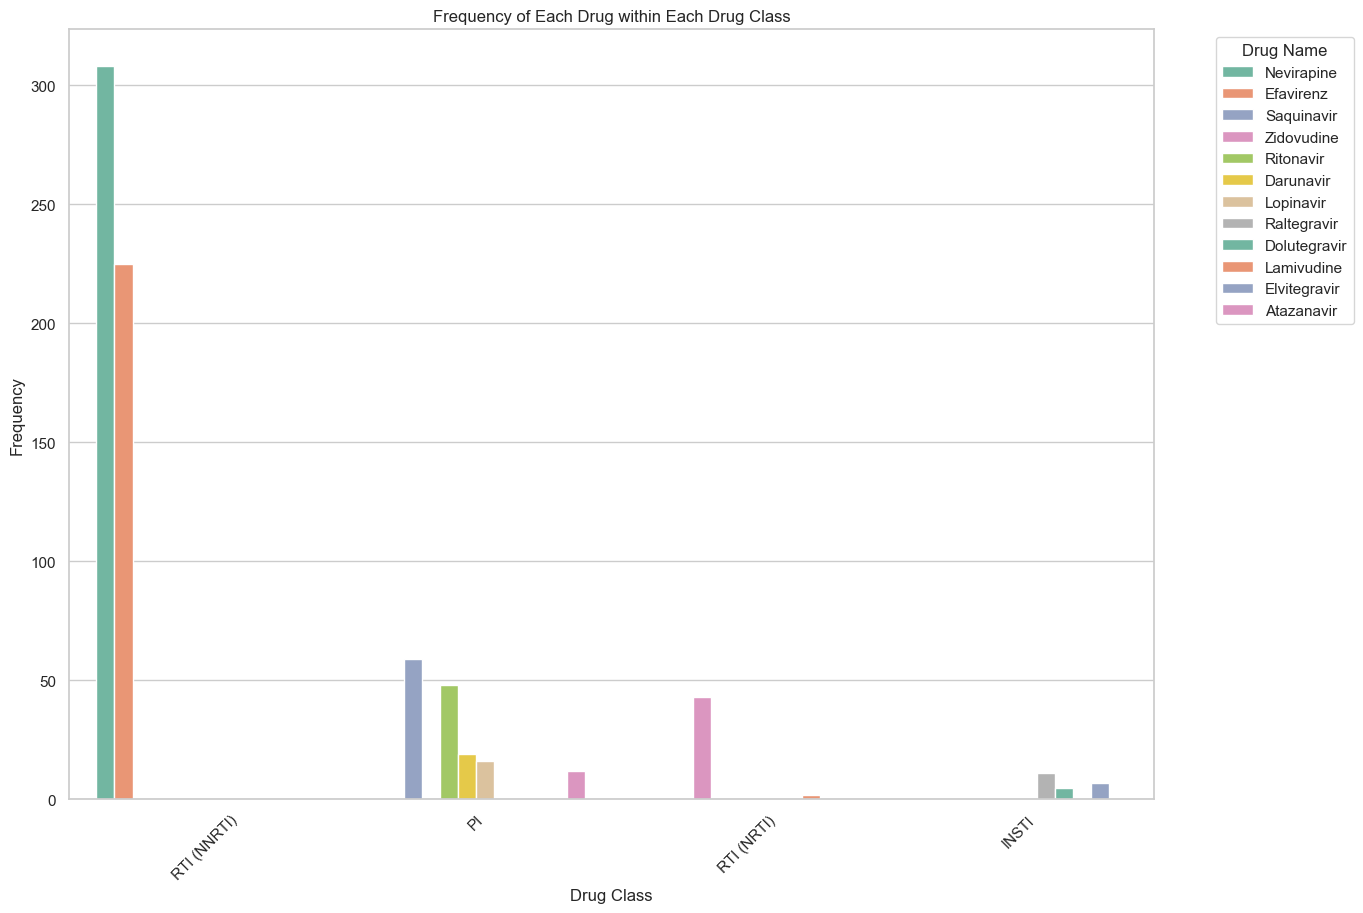

In [132]:
## let's see the distribution of the drugs within each class
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create count plot
g = sns.countplot(data=filtered_data, x="Drug_Class", hue="drug_name", palette="Set2")
plt.title('Frequency of Each Drug within Each Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('Frequency')
plt.legend(title='Drug Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

C:\Users\defer\AppData\Local\Temp\ipykernel_6840\1463803917.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_data, x='drug_name', ax=axes[i], palette='Set2', hue=None)
C:\Users\defer\AppData\Local\Temp\ipykernel_6840\1463803917.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_data, x='drug_name', ax=axes[i], palette='Set2', hue=None)
C:\Users\defer\AppData\Local\Temp\ipykernel_6840\1463803917.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=class_data, x='drug_name', ax=axes[i], palette='Set2', hu

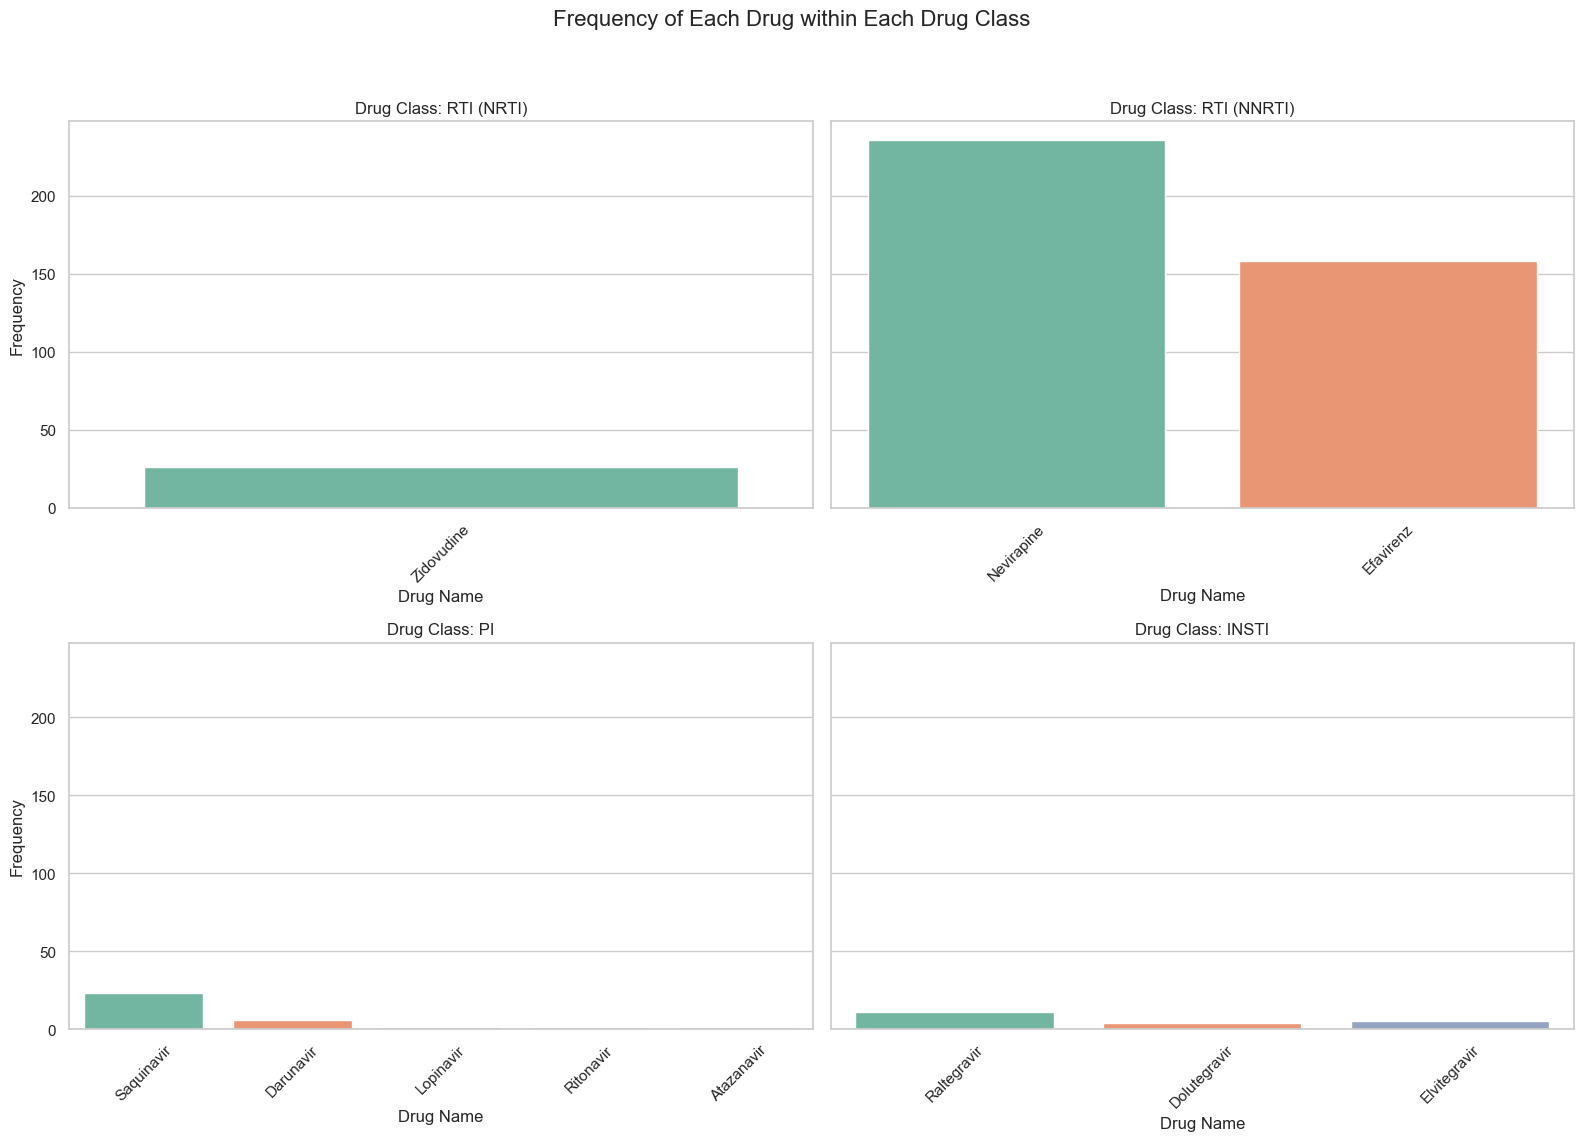

In [157]:
# different plot to have another visualisation
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
fig.suptitle("Frequency of Each Drug within Each Drug Class", fontsize=16)

# define the drug classes for looping
drug_classes = ['RTI (NRTI)', 'RTI (NNRTI)', 'PI', 'INSTI']
axes = axes.flatten()  # Flatten the axes array for easy iteration

# count plot for each drug class
for i, drug_class in enumerate(drug_classes):
    # filter the data for each drug class
    class_data = filtered_data[filtered_data['Drug_Class'] == drug_class]
    
    # count plot
    sns.countplot(data=class_data, x='drug_name', ax=axes[i], palette='Set2', hue=None)
    axes[i].set_title(f"Drug Class: {drug_class}")
    axes[i].set_xlabel("Drug Name")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=45)

# adjustment of layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


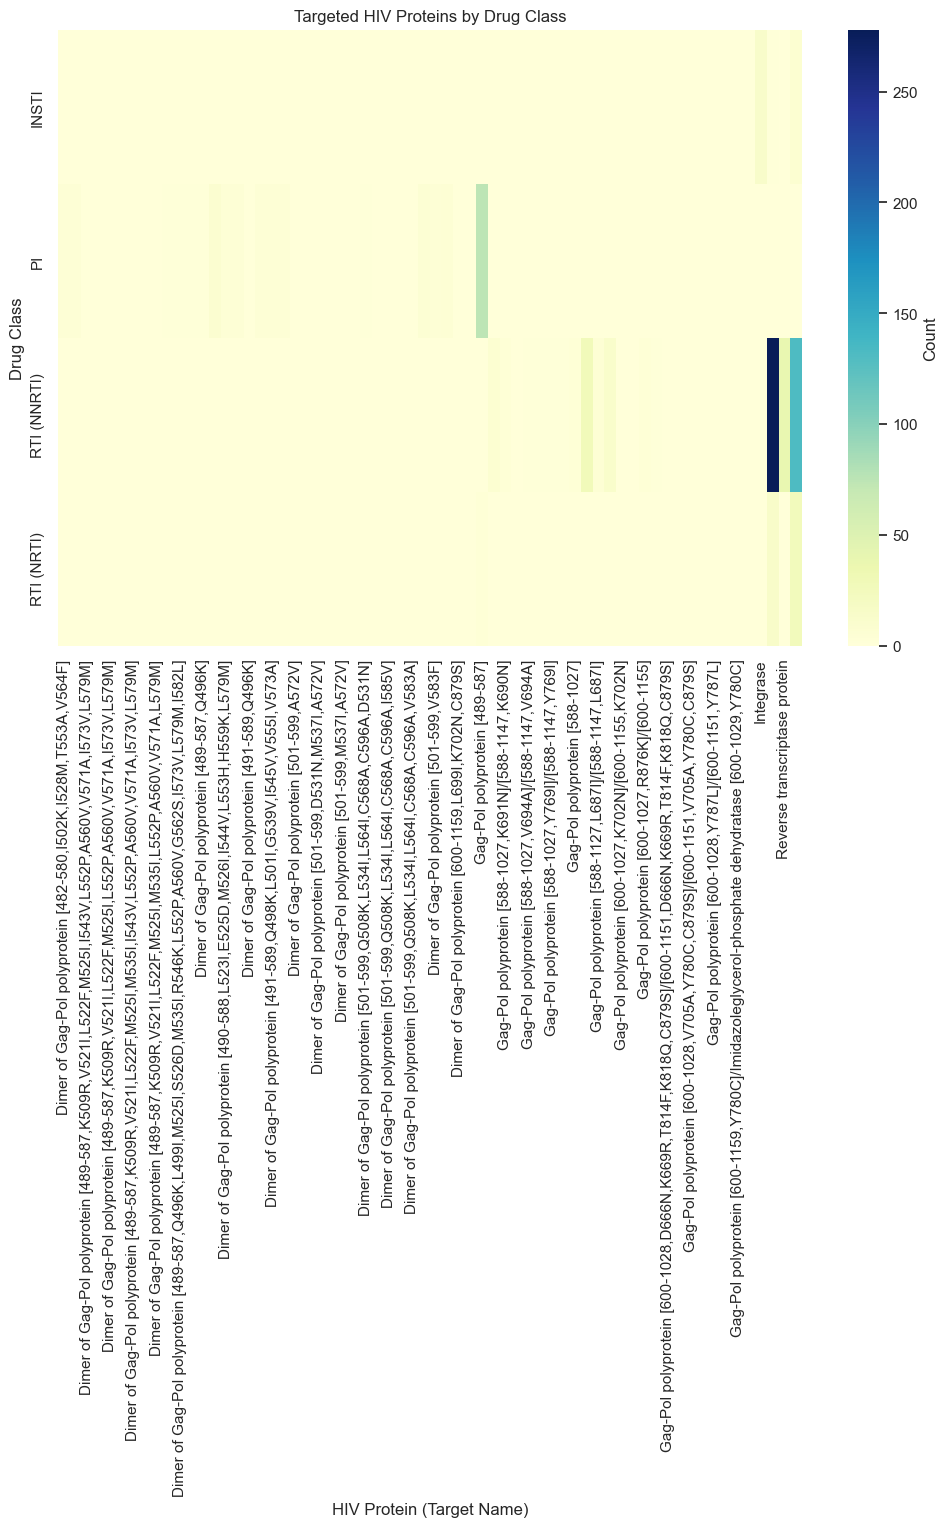

In [135]:
###let's see which  drug class target which proteins

###group by drug class and target name and count occurrences
protein_target_counts = filtered_data.groupby(['Drug_Class', 'Target Name']).size().reset_index(name='Count')

##table for a better visualization
table = protein_target_counts.pivot(index='Drug_Class', columns='Target Name', values='Count').fillna(0)

##plot the heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(table, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Targeted HIV Proteins by Drug Class')
plt.ylabel('Drug Class')
plt.xlabel('HIV Protein (Target Name)')
plt.show()

####do i need to make it unique

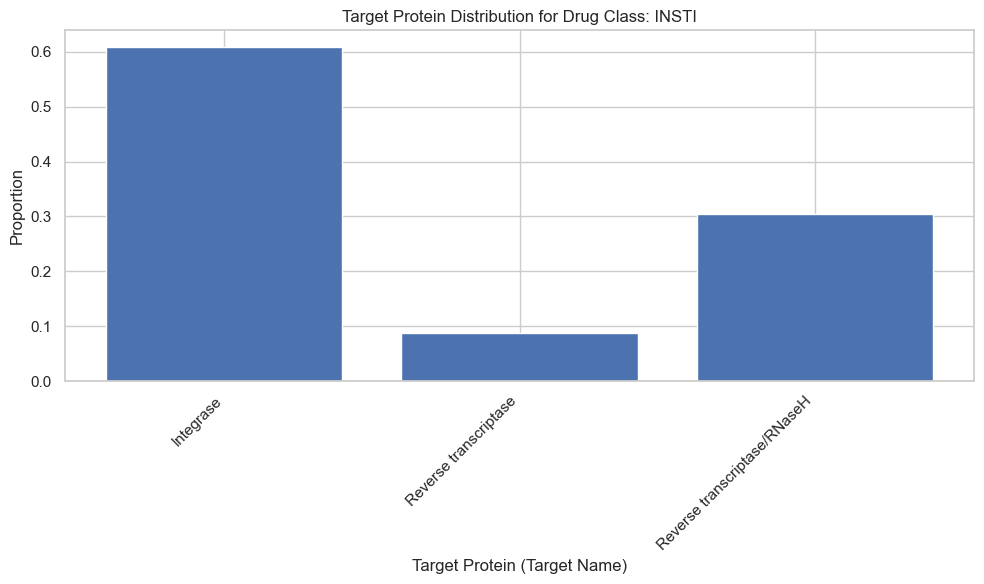

C:\Users\defer\AppData\Local\Temp\ipykernel_6840\1294094938.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


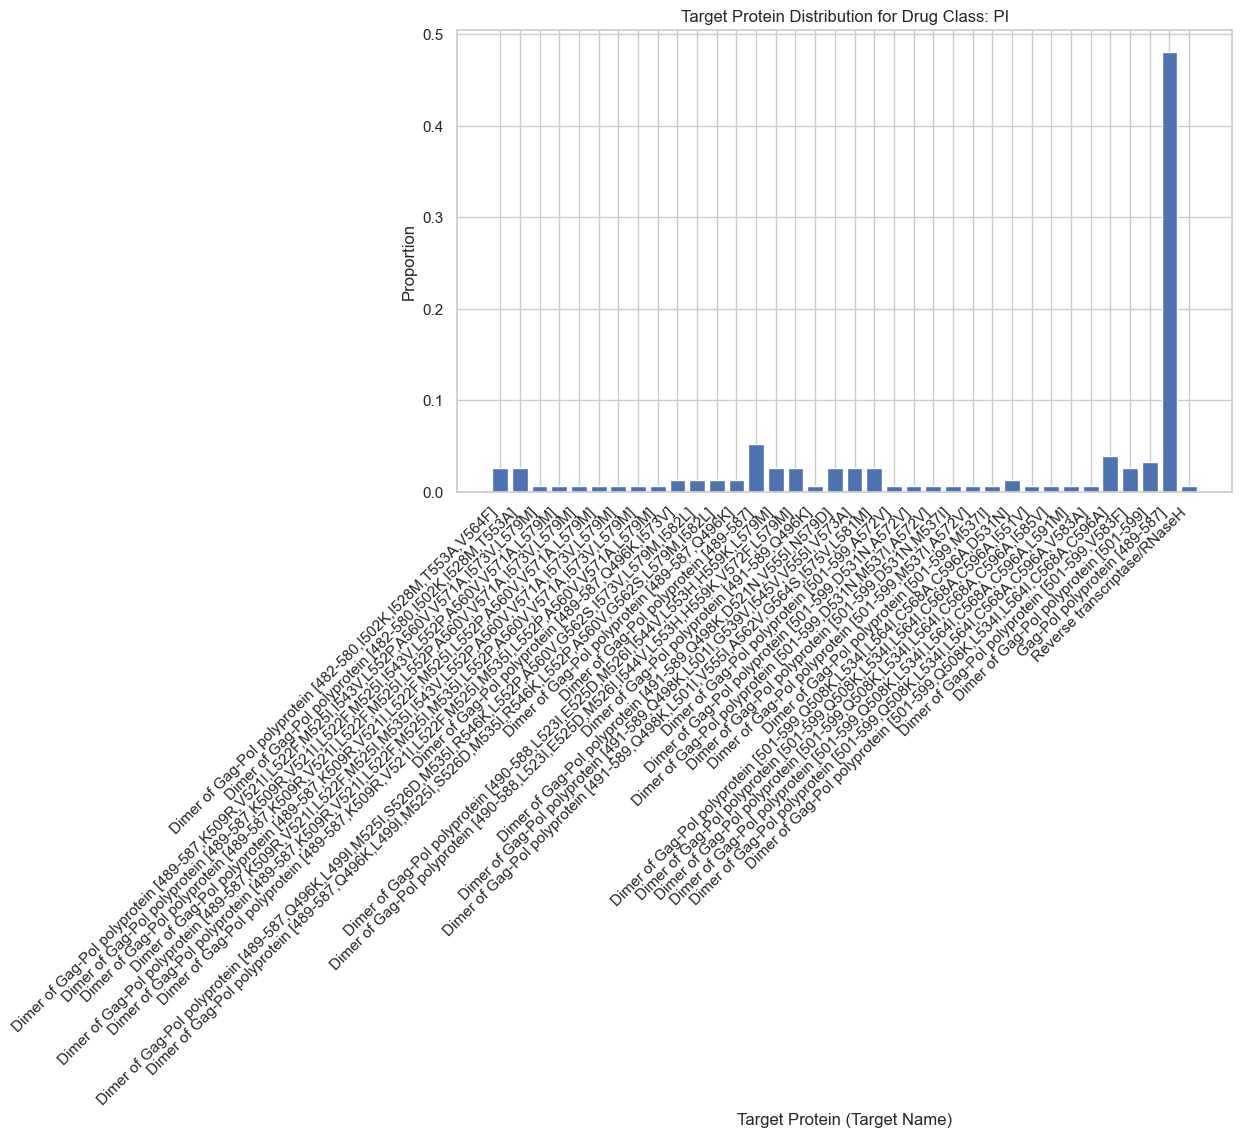

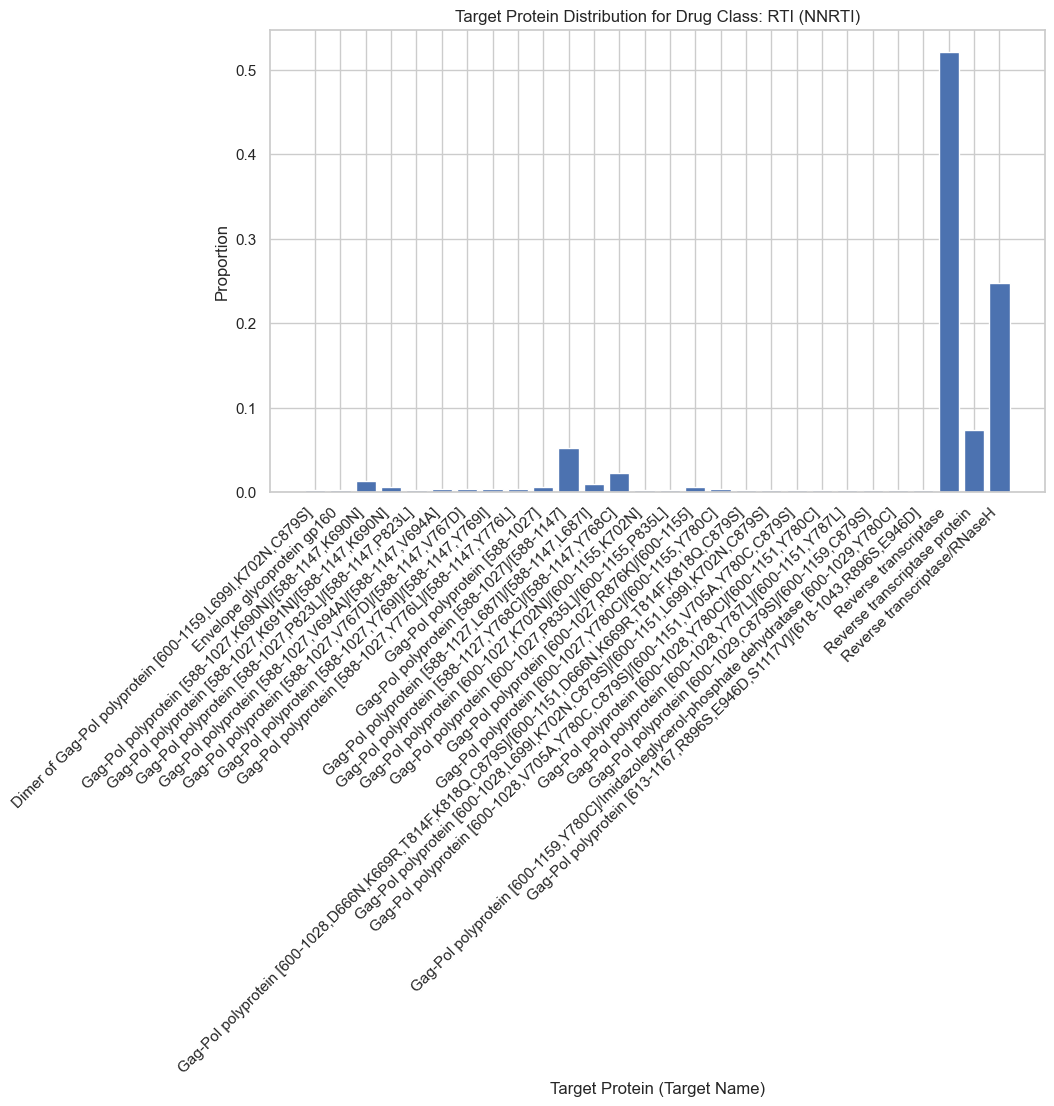

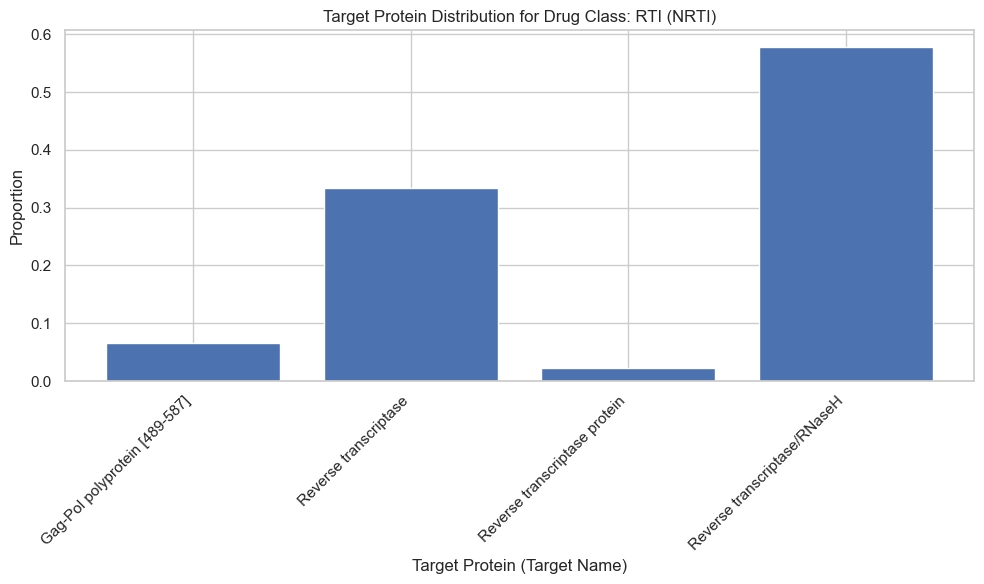

In [136]:

# Calculating the proportion of each target protein within each drug class using transform to know the proportion
protein_target_counts['Proportion'] = protein_target_counts.groupby('Drug_Class')['Count'].transform(lambda x: x / x.sum())

# Plotting (unique to count each target once)
drug_classes = protein_target_counts['Drug_Class'].unique()

# Generate bar charts for each drug class
for drug_class in drug_classes:
    subset = protein_target_counts[protein_target_counts['Drug_Class'] == drug_class]
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset['Target Name'], subset['Proportion'])
    plt.title(f'Target Protein Distribution for Drug Class: {drug_class}')
    plt.xlabel('Target Protein (Target Name)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


PI seems to prefer targeting gag-pol protein, INSTI integrase and reverse  trascriptase/rnaseH. RTI have a wider range of targets. 

In [138]:

filtered_data = filtered_data.dropna(subset=['IC50 (nM)'])


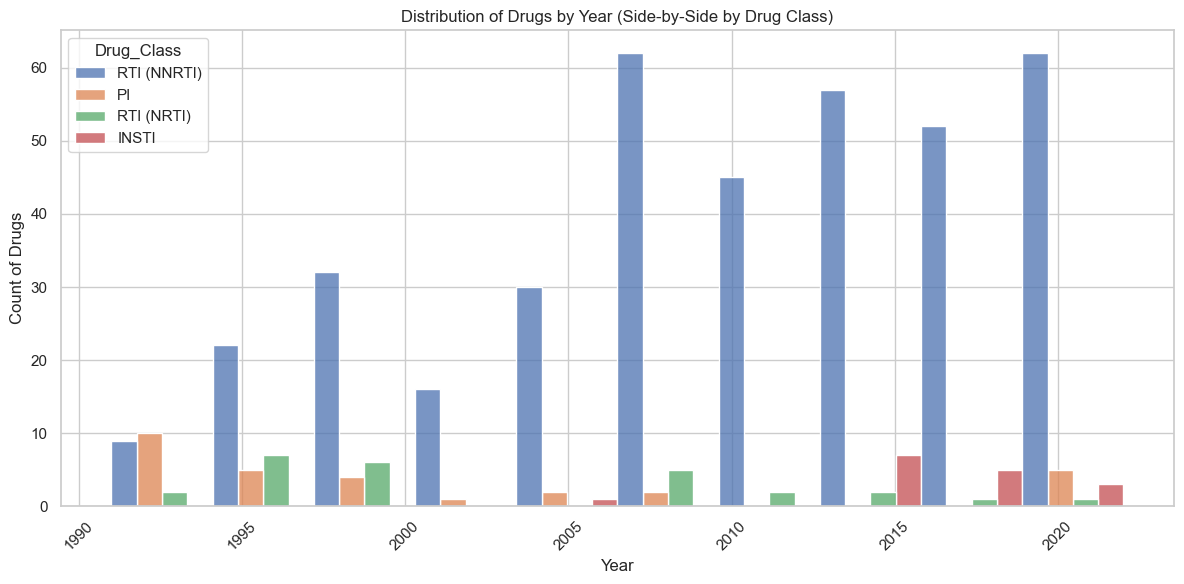

In [139]:
### now, let's see the distribution of durg class over the years
###let's count each drug studied in every article once 
unique_drugs_df = filtered_data.drop_duplicates(subset=['drug_name','Article DOI'])


# Plottng the distribution of drugs by year, hue on drug class
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='year_y', hue='Drug_Class', multiple='dodge', kde=False)
plt.title("Distribution of Drugs by Year (Side-by-Side by Drug Class)")
plt.xlabel("Year")
plt.ylabel("Count of Drugs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We use the publication year as an approximate indicator to explore temporal trends and patterns of discovery within each drug class. However, we recognize that the publication year may not directly correspond to the actual year of discovery, nor does the frequency of publications necessarily correlate with higher utilization rates in patients.  RTI and NNRTI were the first type of drugs introduced and used still today, INSTI were the latest introduced drugs. from our own reaserch we can state that PI were introduced subequently to RTI (Pau AK, George JM. Antiretroviral therapy: current drugs. Infect Dis Clin North Am. 2014 Sep;28(3):371-402. doi: 10.1016/j.idc.2014.06.001. PMID: 25151562; PMCID: PMC4143801. https://pmc.ncbi.nlm.nih.gov/articles/PMC4143801/ TABLE 1)

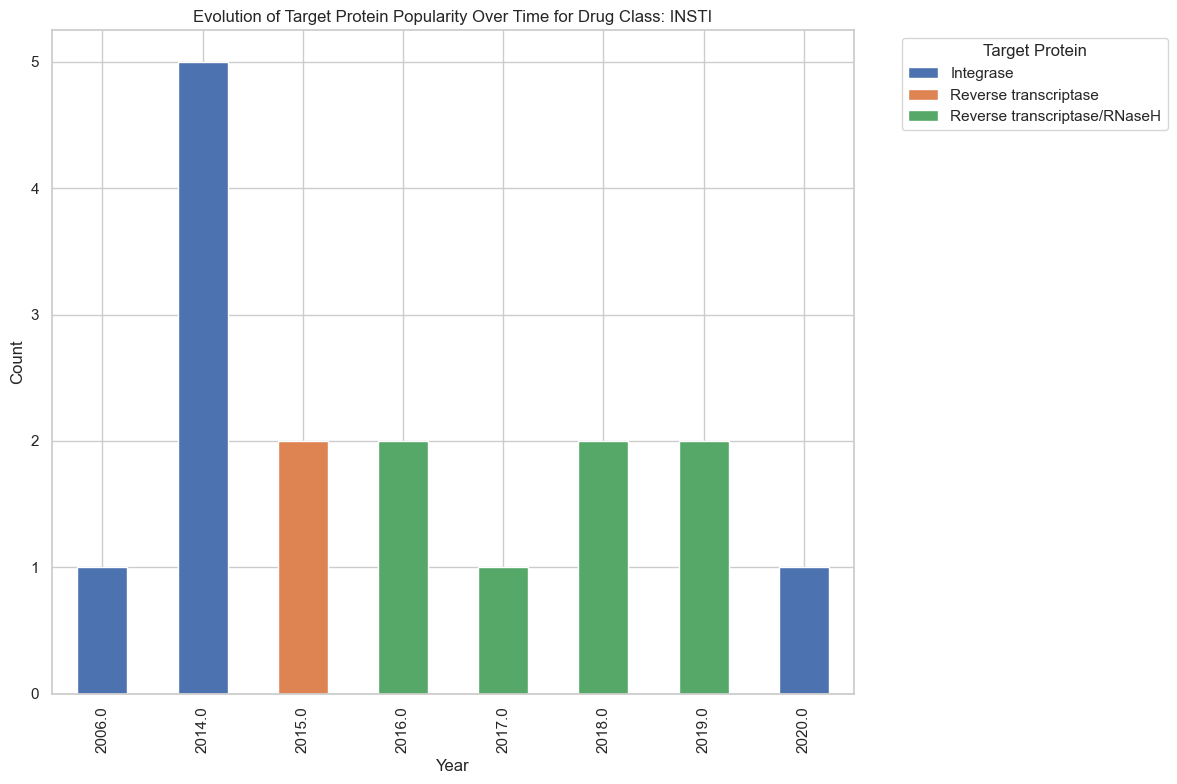

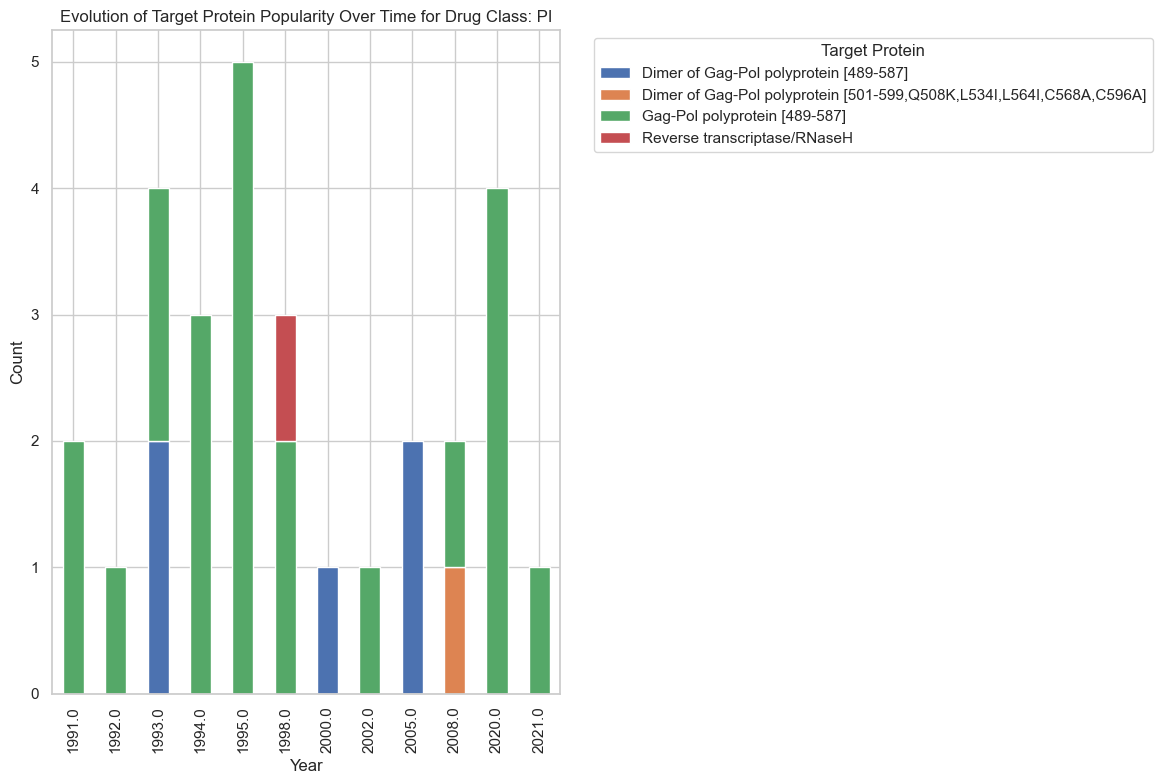

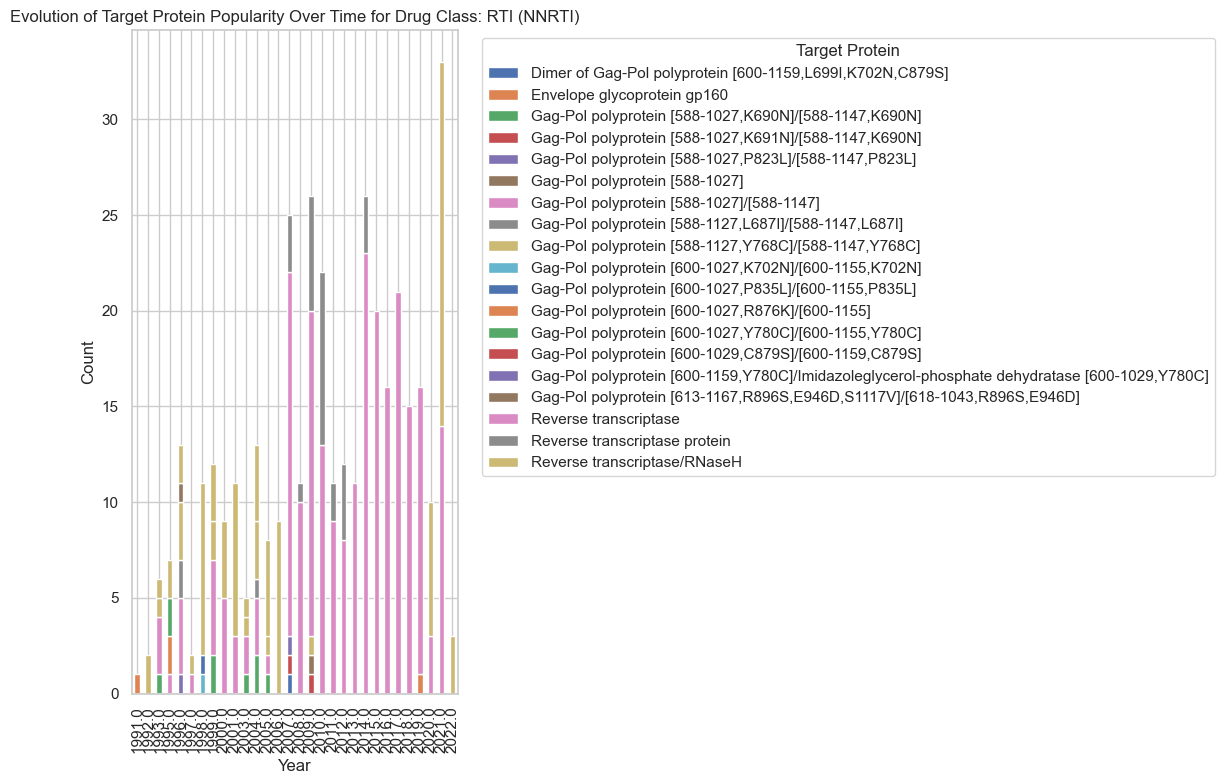

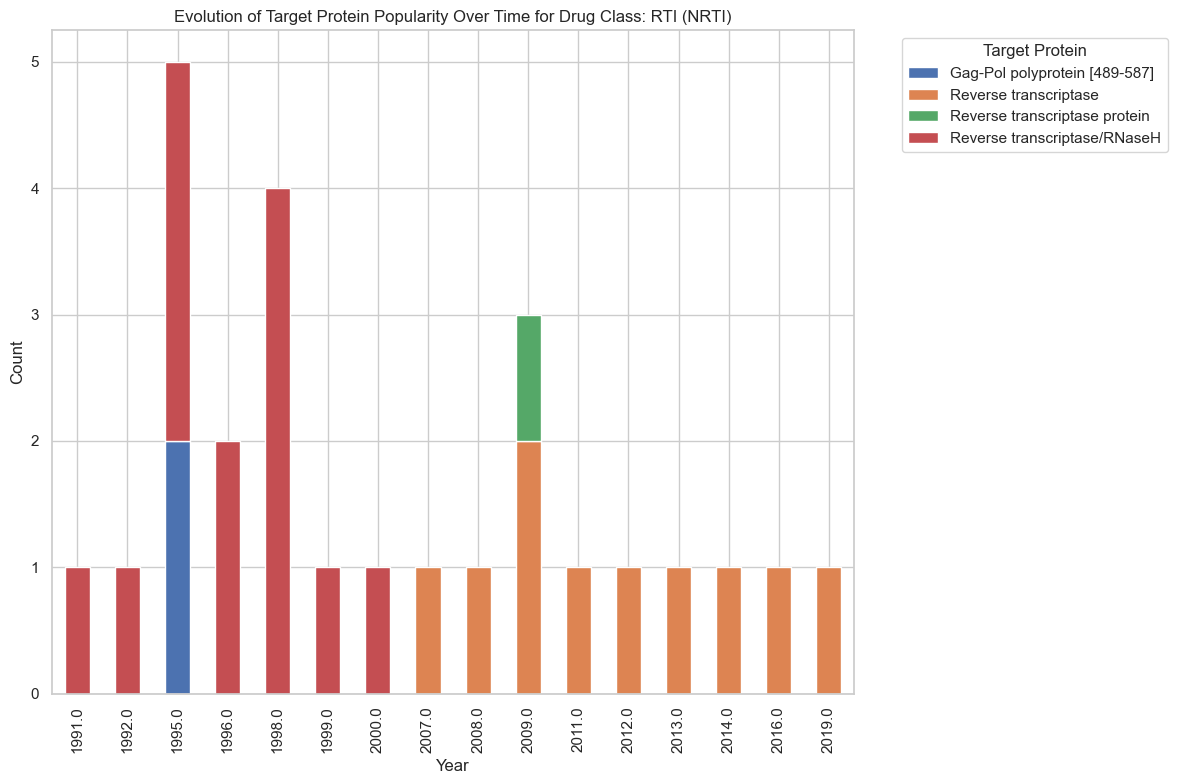

In [142]:
### let's analyse  the distribution of protein target over the years for each drug class


##### Group by drug class target and year and count occurances
temporal_counts = (
    filtered_data.groupby(['Drug_Class', 'Target Name', 'year_y']).size()
    .reset_index(name='Count')
)

####reshape the data to create a table where each target protein has its own column for easier visualization
pivot_table = temporal_counts.pivot_table(
    index='year_y', columns='Target Name', values='Count', aggfunc='sum'
).fillna(0)

# plotting a stacked bar chart of target proteins by year within each drug class
drug_classes = temporal_counts['Drug_Class'].unique()

for drug_class in drug_classes:
    # Filter data for each drug class
    subset = temporal_counts[temporal_counts['Drug_Class'] == drug_class]
    subset_pivot = subset.pivot_table(
        index='year_y', columns='Target Name', values='Count', aggfunc='sum'
    ).fillna(0)

##plot the stacked bar chart
    subset_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'Evolution of Target Protein Popularity Over Time for Drug Class: {drug_class}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Target Protein', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


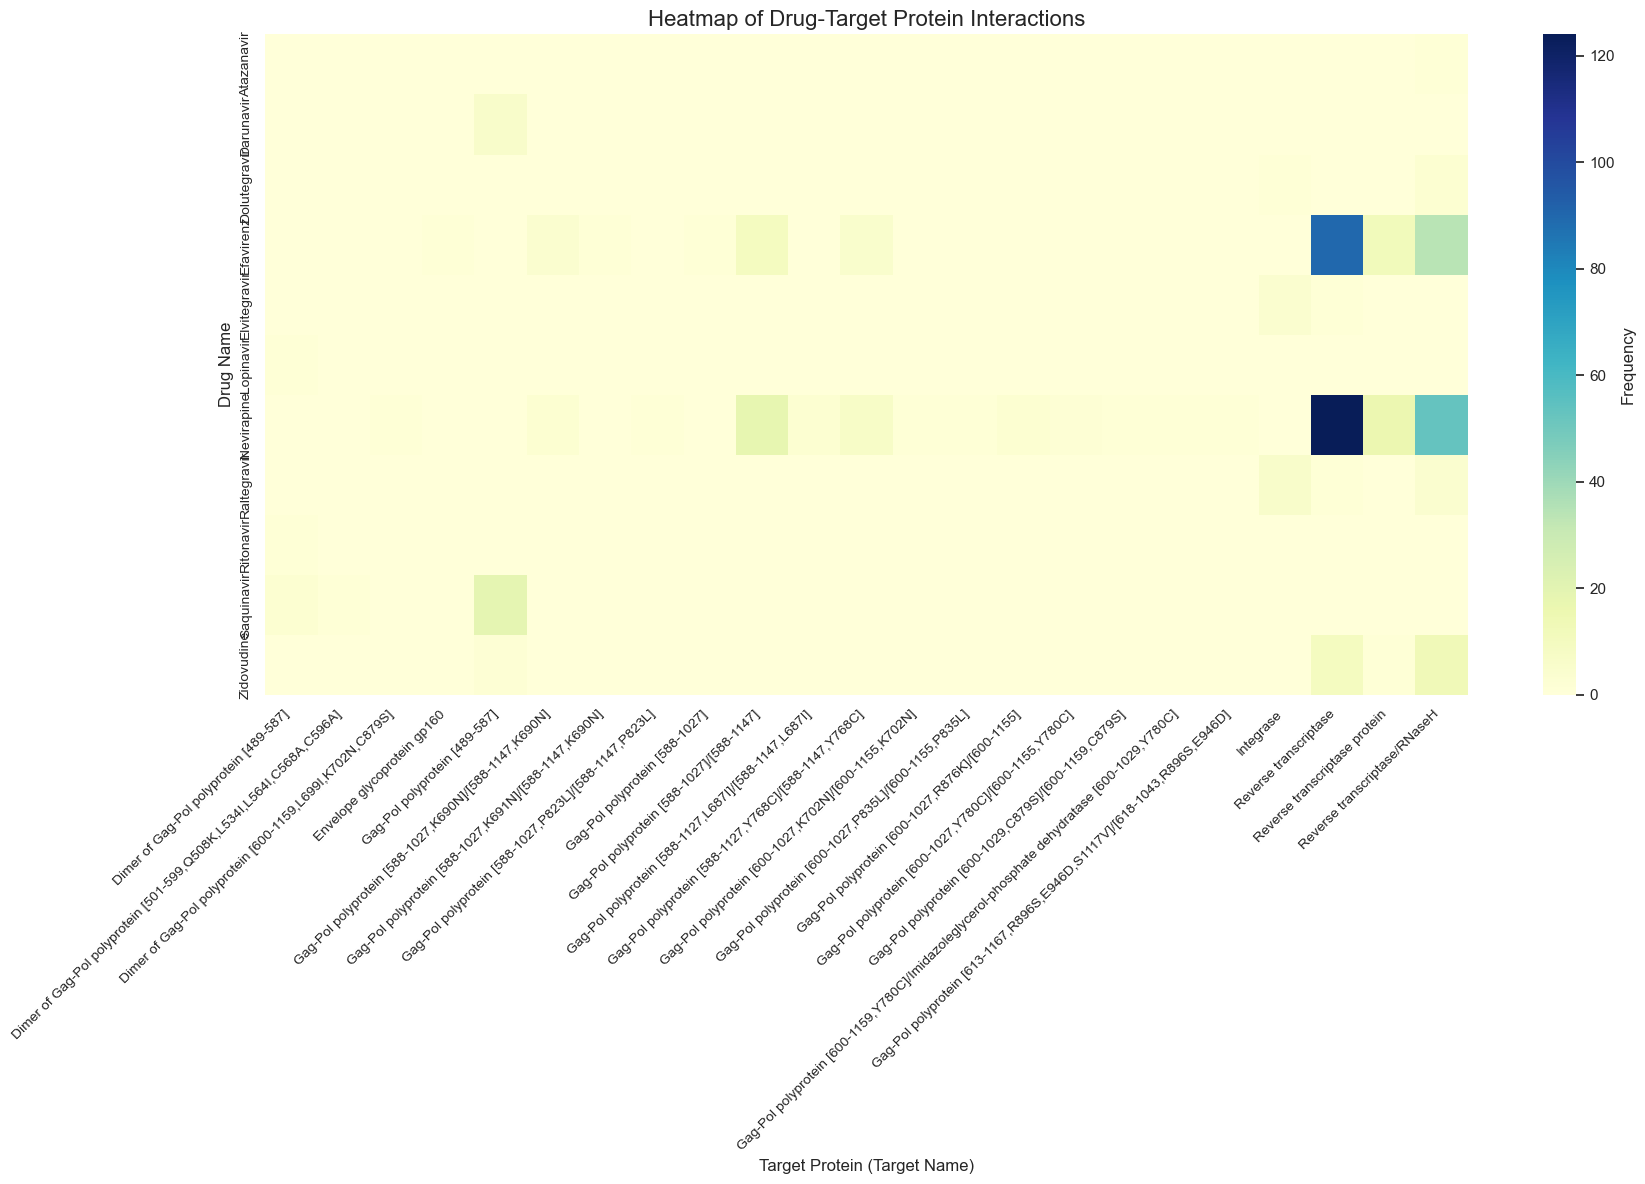

In [143]:
##let s focus on the singles drugs 
# Group by 'Drug_Name' and 'Target Name' and count occurrences
drug_target_counts = (
    filtered_data.groupby(['drug_name', 'Target Name']).size()
    .reset_index(name='Count')
)

# piivot the data to create a matrix with drug name on rows and target on cols
pivot_table = drug_target_counts.pivot_table(
    index='drug_name', columns='Target Name', values='Count', fill_value=0
)

# Plot heatmap with adjusted settings
plt.figure(figsize=(18, 12))  # Increase figure size for readability
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={'label': 'Frequency'}, annot=False)

plt.title('Heatmap of Drug-Target Protein Interactions', fontsize=16)
plt.xlabel('Target Protein (Target Name)', fontsize=12)
plt.ylabel('Drug Name', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\defer\AppData\Local\Temp\ipykernel_6840\3451896768.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Drug_Class', y='IC50 (nM)', palette="Set3", order=drug_class_order)


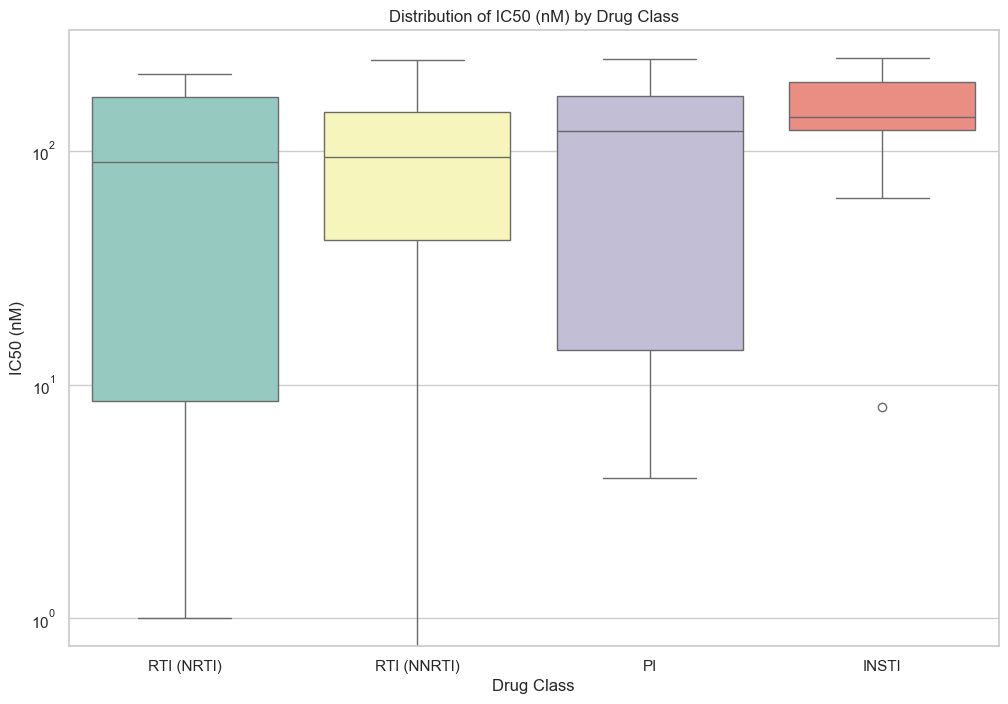

In [144]:
###let s see the affinity 
# Define the historical order of drug classes
drug_class_order = ['RTI (NRTI)', 'RTI (NNRTI)', 'PI', 'INSTI']

# Set up the plotting style
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 8))

# Plot IC50 distribution for each drug class using a boxplot, ordered by historical introduction, and invert y-axis
sns.boxplot(data=filtered_data, x='Drug_Class', y='IC50 (nM)', palette="Set3", order=drug_class_order)
plt.yscale('log')  # Log scale for better visualization
plt.gca().invert_yaxis()  # Invert the y-axis

# Labels and title
plt.title('Distribution of IC50 (nM) by Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('IC50 (nM)')
plt.show()

The common sense would tell us that affinity should getter better over the years (decreasing). Instead, the trend is opposite from what expected. This could be due to potential biases in such a small sample of drugs, maybe newer drugs are optimized not only in affinity but also in other therapeutic properties or maybe HIV developed resistance. These kind of question will be dealt in this project.ed


